## Fasada (ang. Facade)

**Typ**: strukturalny \
**Zakres**: obiektowy

<div style="border: solid 1px;padding: 20px;text-align: center">
Wzorzec <b>Fasada</b> zapewnia jeden, zunifikowany interfejs dla całego zestawu interfejsów określonego podsystemu. Ułatwia dostęp do złożonego systemu poprzez stworzenie nowego interfejsu wysokiego poziomu.
</div>

Uproszczony diagram klas

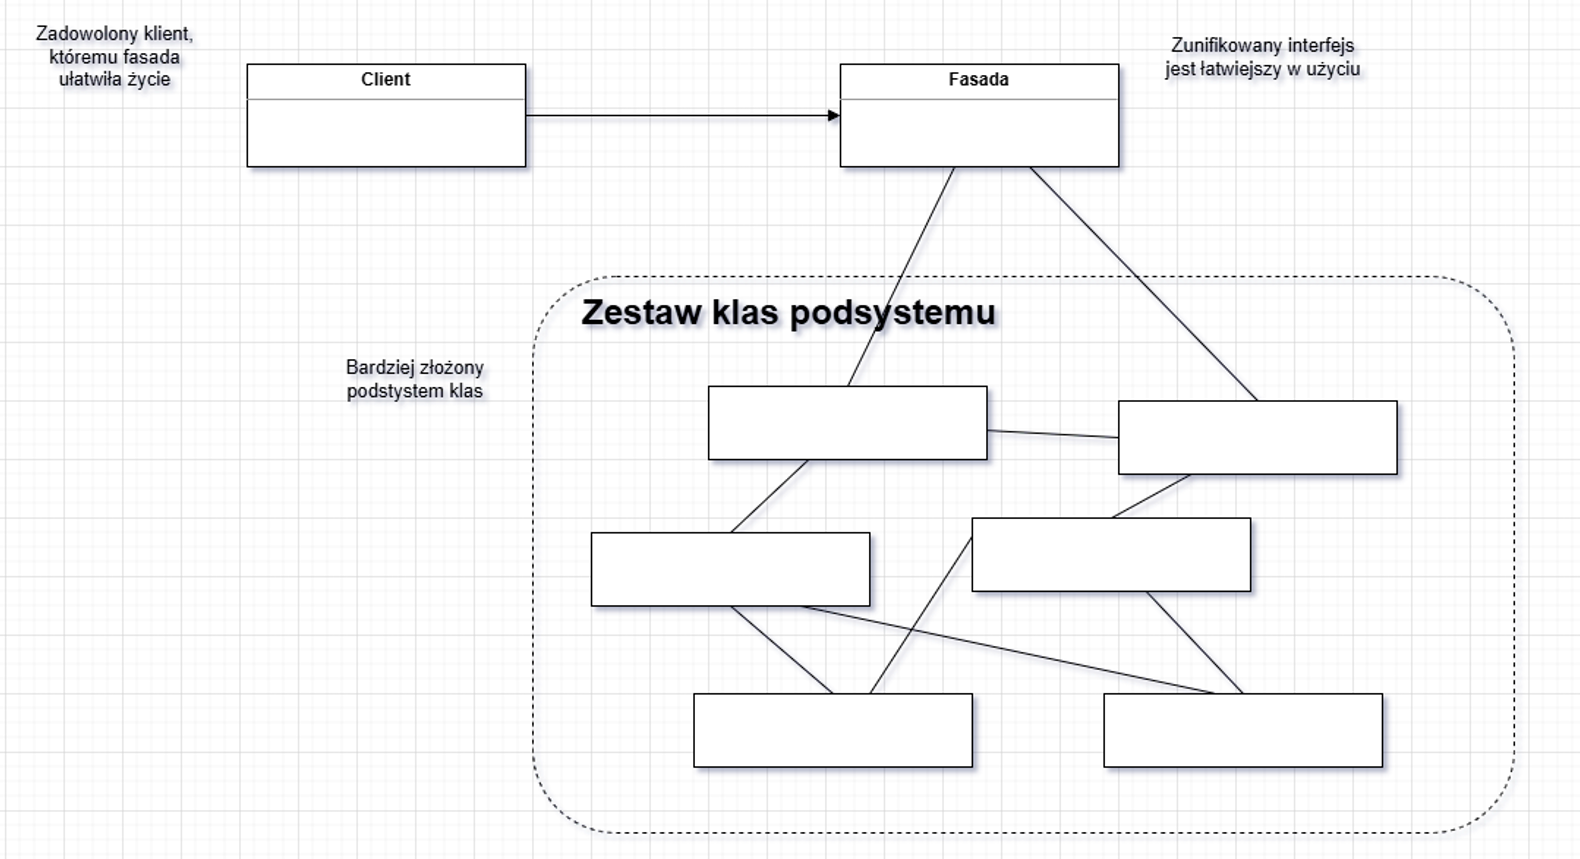

Diagram sekwencji

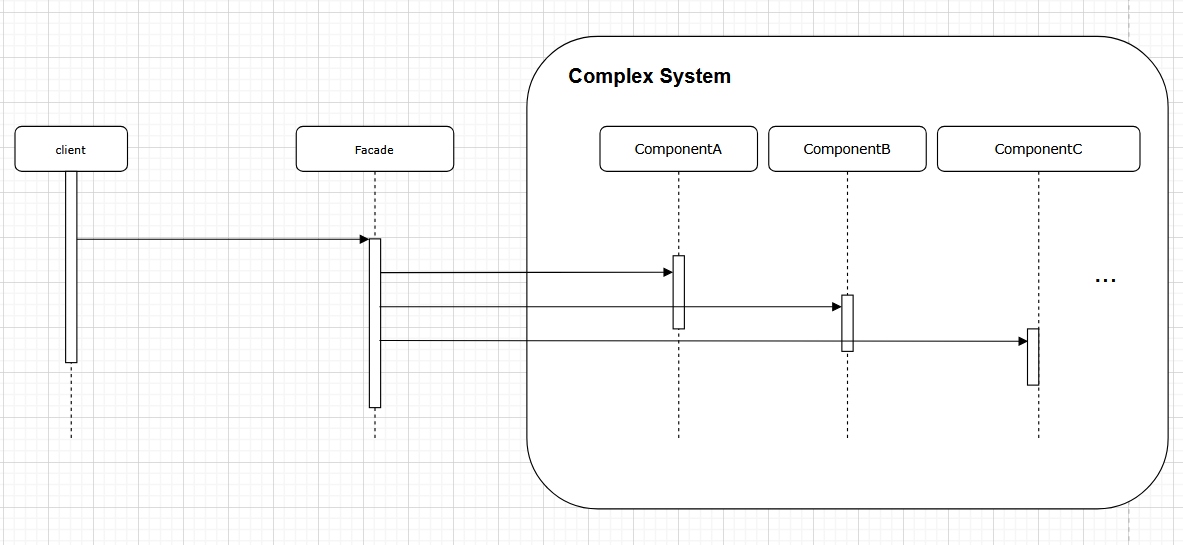

Załóżmy, że dostaliśmy złożony system do kina domowego. Zamockujmy jego część.

In [3]:
class DvdPlayer:
    def on(self):
        print("Włączono odtwarzacz dvd")

    def play(self, movie: str):
        print(f"Rozpoczęto odtwarzanie filmu {movie}")

    def stop(self):
        print("Zatrzymano odtwarzanie filmu")

    def eject(self):
        print("Wysunięto szufladkę na płyty")

    def off(self):
        print("Wyłączono odtwarzacz dvd")


class CdPlayer:
    pass


class Amplifier:
    def on(self):
        print("Włączono wzmacniacz")

    def set_dvd(self, dvd: DvdPlayer):
        print(f"Podłączono odtwarzacz dvd {dvd}")

    def set_surround_sound(self):
        print("Włączono dźwięk przestrzenny")

    def set_volume(self, level: int):
        print(f"Ustawiono głośność na {level}")

    def off(self):
        print("Wyłaczono wzmacniacz")


class Projector:
    def on(self):
        print("Włączono projektor")

    def wide_screen_mode(self):
        print("Ustawiono szerokoekranowy tryb")

    def off(self):
        print("Wyłączono projektor")


class TheaterLights:
    def on(self):
        print("Włączono światła")

    def dim(self, level: int):
        print(f"Przyciemniono światła do poziomu {level}")


class Screen:
    def down(self):
        print("Opuszczono ekran")

    def up(self):
        print("Podniesiono ekran")


class PopcornPopper:
    def on(self):
        print("Włączono maszynkę do robienia popcornu")

    def pop(self):
        print("Rozpoczęto przygotowanie popcornu")

    def off(self):
        print("Wyłaczono maszynkę do robienia popcornu")

Używając tego systemu spróbujmy sobie wyobrazić jak mogłoby wyglądać odtworzenie filmu.

In [4]:
# client code
print("Przygotuj się na oglądanie filmu...")
popper = PopcornPopper()
lights = TheaterLights()
screen = Screen()
projector = Projector()
amp = Amplifier()
dvd = DvdPlayer()

popper.on()
popper.pop()
lights.dim(10)
screen.down()
projector.on()
projector.wide_screen_mode()
amp.on()
amp.set_dvd(dvd)
amp.set_surround_sound()
amp.set_volume(5)
dvd.on()
dvd.play("Matrix")

Przygotuj się na oglądanie filmu...
Włączono maszynkę do robienia popcornu
Rozpoczęto przygotowanie popcornu
Przyciemniono światła do poziomu 10
Opuszczono ekran
Włączono projektor
Ustawiono szerokoekranowy tryb
Włączono wzmacniacz
Podłączono odtwarzacz dvd <__main__.DvdPlayer object at 0x000001203AEFAA50>
Włączono dźwięk przestrzenny
Ustawiono głośność na 5
Włączono odtwarzacz dvd
Rozpoczęto odtwarzanie filmu Matrix


A jak będzie wyglądało wyłączenie filmu?

In [5]:
# client code
print("\n---- Koniec seansu. wyłączam kino domowe...")
popper.off()
lights.on()
screen.up()
projector.off()
amp.off()
dvd.stop()
dvd.eject()
dvd.off()


---- Koniec seansu. wyłączam kino domowe...
Wyłaczono maszynkę do robienia popcornu
Włączono światła
Podniesiono ekran
Wyłączono projektor
Wyłaczono wzmacniacz
Zatrzymano odtwarzanie filmu
Wysunięto szufladkę na płyty
Wyłączono odtwarzacz dvd


Trochę to wszystko skomplikowane. Klient bardzo mocno sprzężony z całym systemem klas kina domowego. Spróbujmy to wszystko uprościć, porozplątywać.

Stwórzmy klasę `HomeTeaterFacade`, która będzie pełniła rolę fasady. Przejmie odpowiedzialność za wszystkie te zależności (odciążając z nich tym samym klienta) i wystawi jakiś prosty interfejs za pomocą które będzie można łatwo wywoływać powyższe (i inne) scenariusz.

In [6]:
class HomeTheaterFacade:
    def __init__(
        self,
        amp: Amplifier,
        dvd: DvdPlayer,
        projector: Projector,
        lights: TheaterLights,
        screen: Screen,
        popper: PopcornPopper
    ):
        self.amp = amp
        self.dvd = dvd
        self.projector = projector
        self.lights = lights
        self.screen = screen
        self.popper = popper

    def watch_movie(self, movie: str):
        print("Przygotuj się na oglądanie filmu...")
        self.popper.on()
        self.popper.pop()
        self.lights.dim(10)
        self.screen.down()
        self.projector.on()
        self.projector.wide_screen_mode()
        self.amp.on()
        self.amp.set_dvd(dvd)
        self.amp.set_surround_sound()
        self.amp.set_volume(5)
        self.dvd.on()
        self.dvd.play("Matrix")

    def end_movie(self):
        print("---- Koniec seansu. wyłączam kino domowe...")
        popper.off()
        lights.on()
        screen.up()
        projector.off()
        amp.off()
        dvd.stop()
        dvd.eject()
        dvd.off()


Stwórzmy fasadę

In [10]:
# client code
# TODO: inicjalizacja fasady
facade = HomeTheaterFacade(
    Amplifier(),
    DvdPlayer(),
    Projector(),
    TheaterLights(),
    Screen(),
    PopcornPopper(),
)

I jak teraz będą wyglądały oba scenariusze?

In [11]:
# TODO: włącz film "Matrix"
facade.watch_movie("Matrix")

Przygotuj się na oglądanie filmu...
Włączono maszynkę do robienia popcornu
Rozpoczęto przygotowanie popcornu
Przyciemniono światła do poziomu 10
Opuszczono ekran
Włączono projektor
Ustawiono szerokoekranowy tryb
Włączono wzmacniacz
Podłączono odtwarzacz dvd <__main__.DvdPlayer object at 0x000001203AEFAA50>
Włączono dźwięk przestrzenny
Ustawiono głośność na 5
Włączono odtwarzacz dvd
Rozpoczęto odtwarzanie filmu Matrix


In [12]:
# TODO: wyłącz film
facade.end_movie()

---- Koniec seansu. wyłączam kino domowe...
Wyłaczono maszynkę do robienia popcornu
Włączono światła
Podniesiono ekran
Wyłączono projektor
Wyłaczono wzmacniacz
Zatrzymano odtwarzanie filmu
Wysunięto szufladkę na płyty
Wyłączono odtwarzacz dvd


Z perspektywy klienta wygląda to znacznie prościej.